In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import (
    CSVLogger,
    EarlyStopping,
    ModelCheckpoint,
    TensorBoard,
    ReduceLROnPlateau,
)
from keras.layers import Dense, Input, ReLU
from keras.losses import MeanSquaredError as MSELoss
from keras.metrics import MeanSquaredError as MSEMetric
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    root_mean_squared_error,
    root_mean_squared_log_error,
)
from sklearn.model_selection import train_test_split

In [2]:
data, target = load_diabetes(return_X_y=True, as_frame=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [4]:
model = Sequential(
    layers=[
        Input(shape=(10,)),
        Dense(128),
        ReLU(),
        Dense(64),
        ReLU(),
        Dense(32),
        ReLU(),
        Dense(1),
    ],
    name="ann",
)

In [5]:
model.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss=MSELoss(), optimizer=Adam(), metrics=[MSEMetric()])  # type: ignore

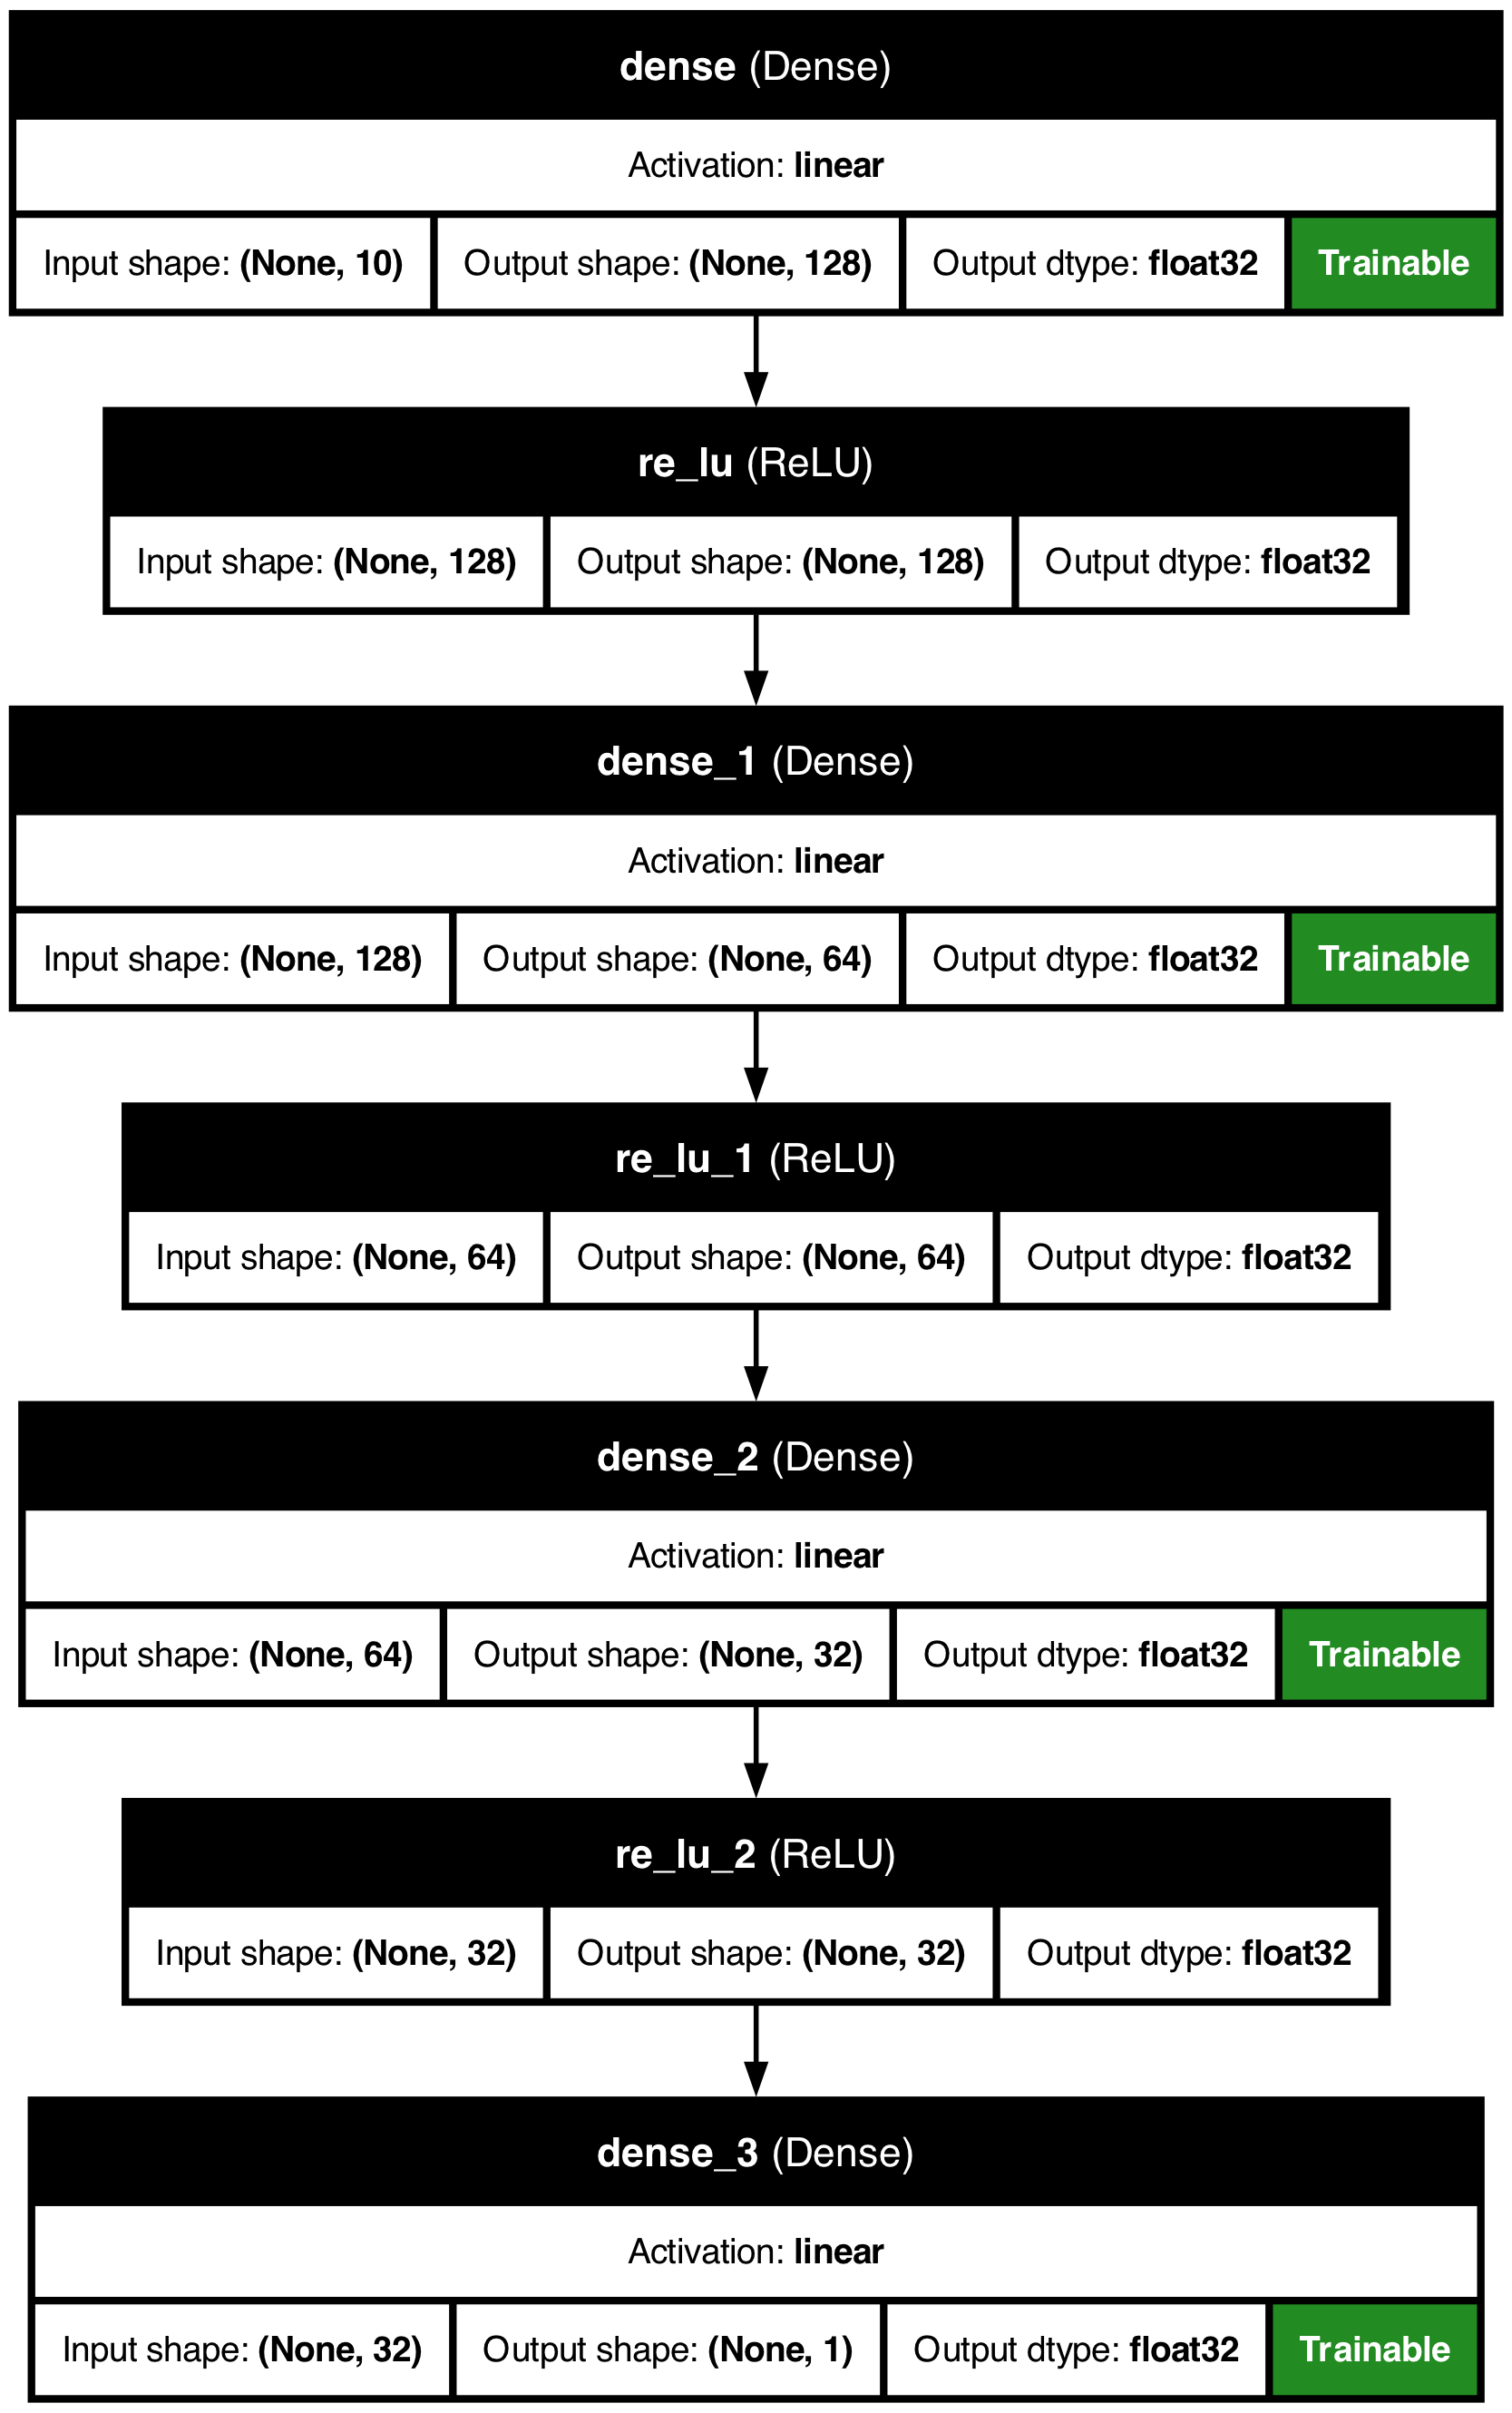

In [ ]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [ ]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
model_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/ann_regression.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
tensorboard_callback = TensorBoard(
    log_dir="../Logs/ann_regression_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/ann_regression_logs"

csvlogger_callback = CSVLogger("../Logs/ann_regression_logs.csv")

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)

In [9]:
ann_history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=0,  # type: ignore
    callbacks=[
        early_stopping_callback,
        model_checkpoint_callback,
        tensorboard_callback,
        csvlogger_callback,
        backup_and_restore_callback,
        reduce_lr_callback,
    ],
)

In [10]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["mean_squared_error"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_mean_squared_error"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 8687.582879638672
Validation loss: 9232.818981933593
8687.582880 Training accuracy with a standard deviation of 9314.273113
9232.818982 Validation accuracy with a standard deviation of 9418.747190


Text(0.5, 1.0, 'Training and Validation Loss')

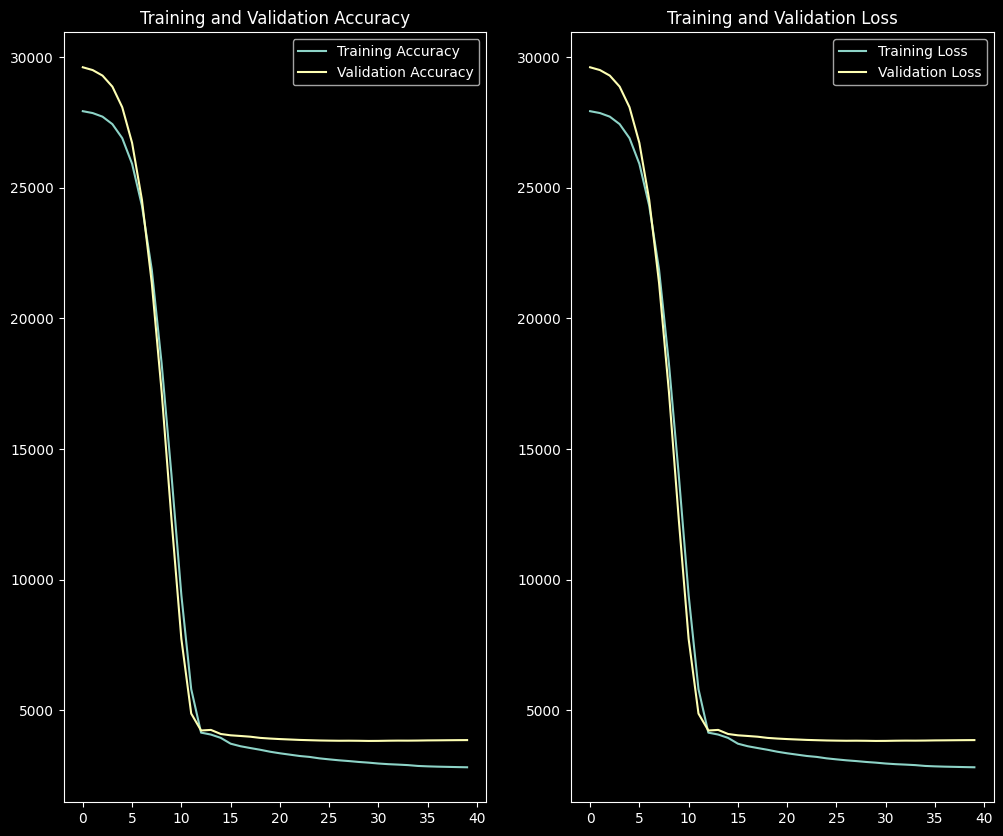

In [11]:
epochs_range = range(len(ann_history.history["loss"]))

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

In [12]:
ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3107.4092 - mean_squared_error: 3107.4092
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3107.4092 - mean_squared_error: 3107.4092
Test loss: 3107.4091796875
Test accuracy: 3107.4091796875


In [13]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [14]:
print("The coefficient of determination :", r2_score(y_test, y_pred))
adjusted_r2_score = 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (  # type: ignore
    len(y_test) - X_test.shape[1] - 1
)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.47107930820849797
The adjusted coefficient of determination : 0.4032689631070233


In [15]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error (RMSE) :",
    root_mean_squared_error(y_test, y_pred),
)
print("Mean Squared Log Error (MSLE) :", mean_squared_log_error(y_test, y_pred))
print(
    "Root Mean Squared Log Error (RMSLE) :",
    root_mean_squared_log_error(y_test, y_pred),
)
print(
    "Mean Absolute Percentage Error (MAPE) :",
    mean_absolute_percentage_error(y_test, y_pred),
)

Mean Absolute Error (MAE) : 46.04378569527958
Mean Squared Error (MSE) : 3107.40899750059
Root Mean Squared Error (RMSE) : 55.74413868291975
Mean Squared Log Error (MSLE) : 0.16458177770997237
Root Mean Squared Log Error (RMSLE) : 0.40568679755443404
Mean Absolute Percentage Error (MAPE) : 0.37439129784421726
